In [1]:
from pygasdynamics import solver
from matplotlib import pyplot as plt
import matplotlib

In [2]:
test_1_gas_state_left = solver.gas_state(1, 0, 3)
test_1_gas_state_right = solver.gas_state(1, 0, 1)
test_1_gas_state = solver.gas_discontinuity_state(
    test_1_gas_state_left, test_1_gas_state_right, 5 / 3
)

test_2_gas_state_left = solver.gas_state(1, 1, 3)
test_2_gas_state_right = solver.gas_state(1, -1, 1)
test_2_gas_state = solver.gas_discontinuity_state(
    test_2_gas_state_left, test_2_gas_state_right, 5 / 3
)

test_3_gas_state_left = solver.gas_state(1, -0.1, 1)
test_3_gas_state_right = solver.gas_state(1, 0.2, 1)
test_3_gas_state = solver.gas_discontinuity_state(
    test_3_gas_state_left, test_3_gas_state_right, 5 / 3
)

In [3]:
plt.style.use("ggplot")


def plot_results(results, labels):
    fig, (v, ro, p) = plt.subplots(3, 1, sharex=True)
    fig.subplots_adjust(hspace=0)
    v.set_title("velocity")
    ro.set_title("density")
    p.set_title("pressure")
    v.margins(0.1, 0.1)
    ro.margins(0.1, 0.1)
    p.margins(0.1, 0.1)

    for result, label in zip(results, labels):
        v.plot(result[0], result[1], label=label)
        ro.plot(result[0], result[2], label=label)
        p.plot(result[0], result[3], label=label)

    plt.legend()
    plt.tight_layout()
    plt.show()

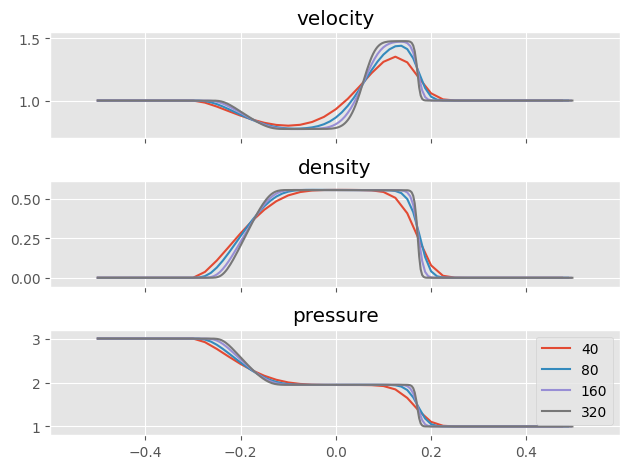

In [4]:
# Searching for the N

solver.GRID_DIVISIONS = 40
grid_40 = solver.solve_discontinuity_numeric(test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9)

solver.GRID_DIVISIONS = 80
grid_80 = solver.solve_discontinuity_numeric(test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9)

solver.GRID_DIVISIONS = 160
grid_160 = solver.solve_discontinuity_numeric(
    test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9
)

solver.GRID_DIVISIONS = 320
grid_320 = solver.solve_discontinuity_numeric(
    test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9
)

plot_results([grid_40, grid_80, grid_160, grid_320], ["40", "80", "160", "320"])

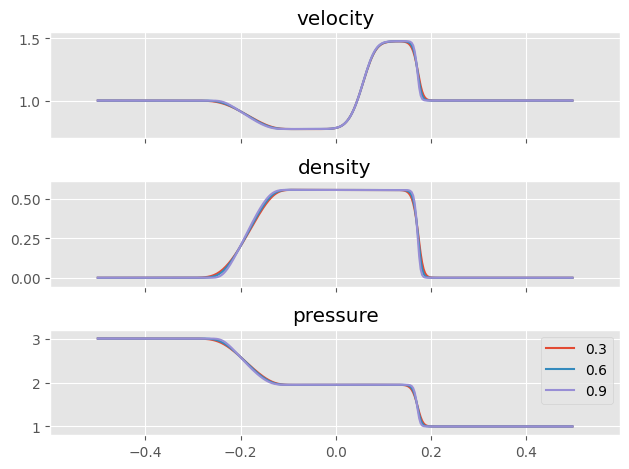

In [5]:
# Searching for the C

solver.GRID_DIVISIONS = 320

cfl_03 = solver.solve_discontinuity_numeric(test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.3)
cfl_06 = solver.solve_discontinuity_numeric(test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.6)
cfl_09 = solver.solve_discontinuity_numeric(test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9)

plot_results([cfl_03, cfl_06, cfl_09], ["0.3", "0.6", "0.9"])

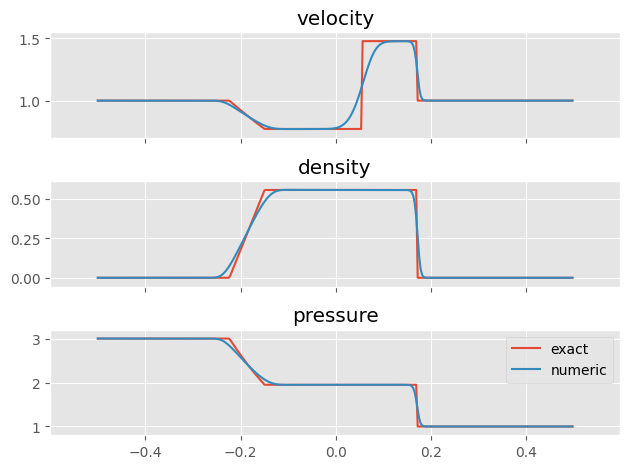

In [6]:
# 1 Test

exact = solver.solve_discontinuity_exact(test_1_gas_state, 0.0, -0.5, 0.5, 0.1)
numeric = solver.solve_discontinuity_numeric(test_1_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9)
plot_results([exact, numeric], ["exact", "numeric"])

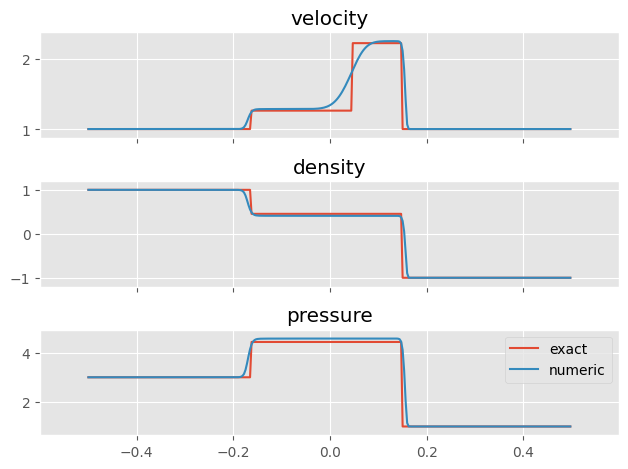

In [7]:
# 2 Test

exact = solver.solve_discontinuity_exact(test_2_gas_state, 0.0, -0.5, 0.5, 0.1)
numeric = solver.solve_discontinuity_numeric(test_2_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9)
plot_results([exact, numeric], ["exact", "numeric"])

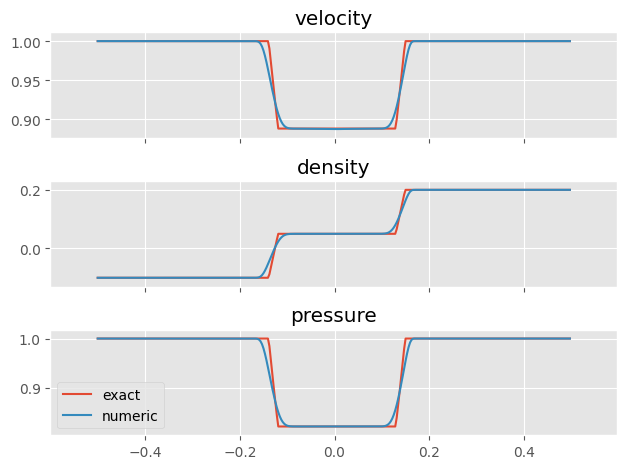

In [8]:
# 3 Test

exact = solver.solve_discontinuity_exact(test_3_gas_state, 0.0, -0.5, 0.5, 0.1)
numeric = solver.solve_discontinuity_numeric(test_3_gas_state, 0.0, -0.5, 0.5, 0.1, 0.9)
plot_results([exact, numeric], ["exact", "numeric"])